This notebook is lets you tinker with Latent Semantic Analysis Singular Value Decomposition

it is meant to help you review some basic linear algebra and NLP concepts

https://www.engr.uvic.ca/~seng474/svd.pdf

In [2]:
# Listing 1

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import math as mt
from numpy import linalg as LA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_olivetti_faces
%matplotlib inline

Example of how to do matrix-vector multiplicaitons in numpy and plot their transformed vectors

we use 2 matrices

<img src="https://miro.medium.com/max/479/1*F-PAQjORuPLU6iRSDsNbvQ@2x.png" width=200 height=200>

$$B = 
\begin{bmatrix}
3 & 0  \\
0 & 1  \\
\end{bmatrix}
$$

the first matrix rotates counterclockwise by theta and the the second stretches horizontal vectors by a factor of 3 

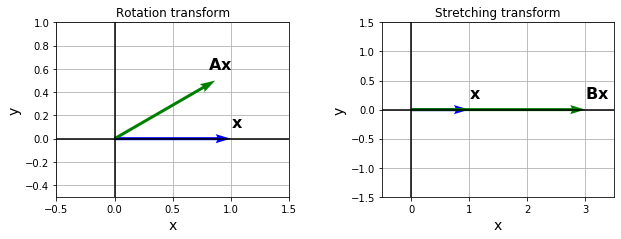

In [3]:
x=np.array([1,0]) # Original vector
degrees = 30
theta = degrees * (mt.pi/180) # 30 degress in radian, 180 degrees is equal to pi radians
A = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]]) # Rotation matrix for theta=30 degrees
B = np.array([[3,0],[0,1]]) # Stretching matrix

Ax = A @ x  # y1 is the rotated vector
Bx = B @ x  # y2 is the stretched vector

# Reshaping and storing both x and Ax in t1 to be plotted as vectors
t1 = np.concatenate([x.reshape(1,2), Ax.reshape(1,2)])
# Reshaping and storing both x and Bx in t2 to be plotted as vectors
t2 = np.concatenate([x.reshape(1,2), Bx.reshape(1,2)])
origin = [0], [0] # origin point

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))
plt.subplots_adjust(wspace=0.4)

# Plotting t1
ax1.quiver(*origin, t1[:,0], t1[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-0.5,1.5])
ax1.set_ylim([-0.5,1])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Rotation transform")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.1, "$\mathbf{x}$", fontsize=16)
ax1.text(0.8, 0.6, "$\mathbf{Ax}$", fontsize=16)

# Plotting t2
ax2.quiver(*origin, t2[:,0], t2[:,1], color=['b', 'g'], width=0.013, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-0.5,3.5])
ax2.set_ylim([-1.5,1.5])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("Stretching transform")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.2, "$\mathbf{x}$", fontsize=16)
ax2.text(3, 0.2, "$\mathbf{Bx}$", fontsize=16)

plt.show()

This example below plots a set of vectors x, blue circle, and transforms x into the blue ellipse t, showing that matrix

$$A = 
\begin{bmatrix}
3 & 2  \\
0 & 2  \\
\end{bmatrix}
$$

has the effect of stretching horizontal vectors, positive or negative, while rotating and/or stratching non horizontal vectors, showing that the set of vectors a*(1,0) are one its eigenvectors and its eignevalue is around 3, later we will see there is another eigenvector eigenvalue pair 

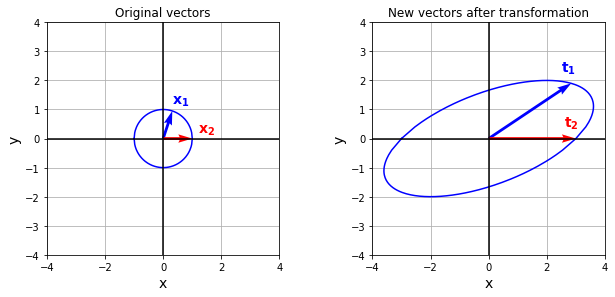

In [5]:
# Listing 2

# Creating the vectors for a unit circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

# getting a sample vector from x
x_sample1 = x[:, 65]
x_sample2 = x[:, 100]

A = np.array([[3, 2],
              [0, 2]]) 

t = A @ x  # Vectors in t are the transformed vectors of x

t_sample1 = t[:, 65]
t_sample2 = t[:, 100]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, x_sample1[0], x_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.quiver(*origin, x_sample2[0], x_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_axisbelow(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.3, 1.2, "$\mathbf{x_1}$", color='b', fontsize=14)
ax1.text(1.2, 0.2, "$\mathbf{x_2}$", color='r', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, t_sample1[0], t_sample1[1], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.quiver(*origin, t_sample2[0], t_sample2[1], color=['r'], width=0.012, angles='xy', scale_units='xy', scale=1)

ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(2.5, 2.3, "$\mathbf{t_1}$", color='b', fontsize=14)
ax2.text(2.6, 0.4, "$\mathbf{t_2}$", color='r', fontsize=14)
plt.savefig('2.png', dpi=300, bbox_inches='tight')

plt.show()

we have imported numpy.linalg as LA and below show you how to extract eigenvalues from matrices

use the LA.eig() function in NumPy to calculate the eigenvalues and eigenvectors. It returns a tuple (lam, u). The first element of this tuple is an array that stores the eigenvalues, and the second element is a 2-d array that stores the corresponding eigenvectors. 

column `u[:,i]` is the eigenvector corresponding to the eigenvalue `lam[i]`

In [12]:
# Listing 3
A = np.array([[3, 0],
              [0, 1]])

lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))
u[:,0]

lam= [3. 1.]
u= [[1. 0.]
 [0. 1.]]


array([1., 0.])

The eigenvectors are normalized to have length 1, which is why the second eigenvector, the ones that has eigenvalue -2, has been normalized from `[-1,1]` to `[-0.70710678,  0.70710678]`

In [14]:
B = np.array([[-1, 1],[0, -2]])
lam, u = LA.eig(B)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))
u[:,1]

lam= [-1. -2.]
u= [[ 1.     -0.7071]
 [ 0.      0.7071]]


array([-0.70710678,  0.70710678])

The linear algebra notation below defines a regular matrix-matrix multiplication between matrix A and B. 

It says that there is some matrix that results from multiplying A and B, call it `[AB]`. The element in `[AB]`'s i-th row and j-th column is the summation or products across all elements k in the i-th row of A and j-th column of B, since they are the same length. This is the einstein notation: 

<img src="https://miro.medium.com/max/362/1*_M1AtFYa50KhvHcgKMolFw@2x.png" width=200 height=200> 

we can use this notation to show that 

$$(AB)^{T} = B^{T}A^{T}$$

the left hand side, (AB)^T can be written in einstein notation

<img src="https://miro.medium.com/max/600/1*xm-xS3xoaZ9Y24_kpq6FBQ@2x.png" width=400 height=400 > 

the right hand side, B^T A^T can be written in einstein notation

<img src="https://miro.medium.com/max/1075/1*0lLAGaaZLIK6JQwgisI-Hw@2x.png" width=600 height=600 > 

which proves the equality (AB)^T = B^T A^T

In [15]:
# Listing 4
A = np.array([[3, 2],
              [0, 2]]) 
lam, u = LA.eig(A)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3. 2.]
u= [[ 1.     -0.8944]
 [ 0.      0.4472]]


In [18]:
# Listing 4
B = np.array([[3, 1],
              [1, 2]]) 


lam, u = LA.eig(B)
print("lam=", np.round(lam, 4))
print("u=", np.round(u, 4))

lam= [3.618 1.382]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


## symmetric matrices

in the cell below, plot t = A @ x, then plot t = B @ x by commenting out the other version of t

Notice that both of the matrices above transform the unit circle into an ellipse, but the symmetrical matrix is the only one where the eigenvectors align with the major and minor axes of the ellipse. 

A symmetric matrix is a matrix that is equal to its transpose. So the elements on the main diagonal are arbitrary but for the other elements, each element on row i and column j is equal to the element on row j and column i (aij = aji)

A symmetric matrix transforms a vector by stretching or shrinking it along its eigenvectors. In addition, we know that all the matrices transform an eigenvector by multiplying its length (or magnitude) by the corresponding eigenvalue. 

eigenvectors of the symmetric matrices are orthogonal

An important property of the symmetric matrices is that an n×n symmetric matrix has n linearly independent and orthogonal eigenvectors, and it has n real eigenvalues corresponding to those eigenvectors. It is important to note that these eigenvalues are not necessarily different from each other and some of them can be equal. Another important property of symmetric matrices is that they are orthogonally diagonalizable.

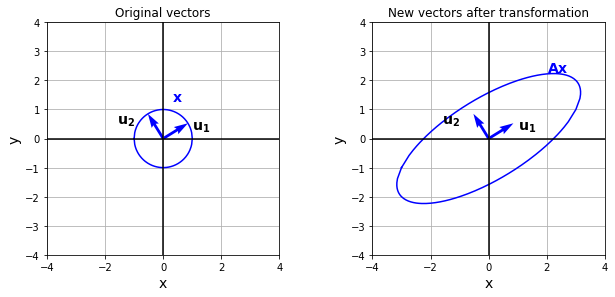

In [32]:
# Listing 5
# Vectors in t are the transformed vectors of x

#t = A @ x   
t = B @ x 

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting x
ax1.plot(x[0,:], x[1,:], color='b')
ax1.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax1.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax1.text(0.3, 1.3, "$\mathbf{x}$", color='b', fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='b')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(1, 0.3, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.6, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(2, 2.3, "$\mathbf{Ax}$", color='b', fontsize=14)

plt.show()

A vector space V can have many different vector bases, but each basis always has the same number of basis vectors. The number of basis vectors of vector space V is called the dimension of V. In Euclidean space R², the vectors:

<img src="https://miro.medium.com/max/479/1*JViCg-HnhTS-1jnnWbD9wg@2x.png" width=500 height=500>

are the implicit basis vectors, infact when you specify a vector such as

<img src="https://miro.medium.com/max/154/1*Tx3YX2xa_Mz02itTXxUHJg@2x.png" width=100 height=100>

the vector elements specify another point in space by their use as the scalars in a linear combination of the basis vectors. The ones that are implicit in our standard notation of vectors are the standard basis vectors.

<img src="https://miro.medium.com/max/321/1*hW2mUgsX4jhtd8WtnMF74g@2x.png" width=300 height=300>

inface, in n dimensional space, any point or vector from the origin, x, in that space is a linear combination of some basis vectors

<img src="https://miro.medium.com/max/537/1*GqB2P-1c5AtSzE4dnchKYw@2x.png" width=400 height=400>

this column vector that describes x (each a is a scalar and each *v* is a column vector that sums together to make another column vector x), can be re-written in the notation below. If you take the column vector `[a_1 . . . a_n]`, rotate it 90 degrees counterclockwise and multiply in into the partitioned column matrix `[v_1 . . . v_n]`, you get:

<img src="https://miro.medium.com/max/1233/1*mRHdO1gDGx0j9fLWm0HAXA@2x.png" width=700 height=700>

subscript B means for the set of basis vectors in the partitioned column matrix `[v_1 . . . v_n]`, aka the change-of-coordinate matrix P_B. The columns of this matrix are the vectors in basis B. You can use the inverse of this matrix to tranlate coordinates in one basis vector system to another. suppose you have a vector `[2 2]` in the standard basis `[1 0]` and `[0 1]`. If you want know what the coordinates are for that same point in space from the viewpoint of the basis vector system `[1 0]` and `[-1/sqrt(2) 1/sqrt(2)]`

<img src="https://miro.medium.com/max/737/1*kfupo2IYA5ykY531q-k9XQ@2x.png" width=500 height=500>

The 2nd figure shows the new basis vectors overlayed onto the standard basis vector coordinate system with the point `[2 2]` held stationary. Traveling a distance of 4 along the `[1 0]` basis vector, then 2.83 along the `[-1/sqrt(2) 1/sqrt(2)]` basis vector gets you to the same location along the new basis vector.

<img src="https://miro.medium.com/max/2489/1*UjPeaQqQqlCfmVIH76JlyQ.jpeg" width=700 height=700>



In [20]:
# Listing 6

# The Basis
v_1 = np.array([[1],[0]])
v_2 = np.array([[-1/mt.sqrt(2)],[1/mt.sqrt(2)]])

# Change of coordinate matrix
p =np.concatenate([v_1, v_2], axis=1)
p_inv =  np.linalg.inv(p) 

# Coordinate of x in R^2
x=np.array([[2], [2]])

# New coordinate relative to basis B
x_B = p_inv @ x

print("x_B=", np.round(x_B, 2))

x_B= [[4.  ]
 [2.83]]


## Eigendecomposition

Recall that An important property of the symmetric matrices is that an n×n symmetric matrix has n linearly independent and orthogonal eigenvectors, and it has n real eigenvalues corresponding to those eigenvectors. It is important to note that these eigenvalues are not necessarily different from each other and some of them can be equal. 

Another important property of symmetric matrices is that they are orthogonally diagonalizable, meaning that if we have an n×n symmetric matrix A, we can decompose into components: D, an n×n diagonal matrix comprised of the n eigenvalues of A. P, an n×n matrix, the columns of P are the n linearly independent eigenvectors of A that correspond to those eigenvalues in D respectively. 

In other words, if u_1, u_2, u_3 …, u_n are the eigenvectors of A, and λ1, λ2, …, λn are their corresponding eigenvalues respectively, then A can be written as

<img src="https://miro.medium.com/max/1221/1*QAF1hPtnJeu2rT1WPUTkXA@2x.png" width=700 height=700>

<img src="https://miro.medium.com/max/229/1*vwSEaqojcKyueynznYP5tQ@2x.png" width=200 height=200>

for example, if A has eigenvectors

<img src="https://miro.medium.com/max/700/1*Z7bctIshMi2Yu6eYmzTWNw@2x.png" width=500 height=500>

and corresponding eignevalues respectively

<img src="https://miro.medium.com/max/496/1*-Cn7vJmX1QmXfBXCFBKB9g@2x.png" width=400 height=400>

then the eignedecomposition of A is: 

<img src="https://miro.medium.com/max/1433/1*y7bwtjlrjT9fRBNFZpcckA@2x.png" width=900 height=900>

A is an 2 x 2 matrix and so has 2 projection matrices, one for each of it's eigenvectors. A projection matrix is the outer product, of a unit vector u and it's transpose u^T, the resulting matrix transforms a arbitrary vector x into it's projection onto u. 


<img src="https://miro.medium.com/max/1246/1*6bSL_9oK5w8Wg593faC-eg@2x.png" width=700 height=700>

<img src="https://miro.medium.com/max/3486/1*beEZWnMrNd4goDIHx3J3rQ.jpeg" width=500 height=500>

A has one of u_1 and u_2, the scaled projection matrix λ_1 * u_1 u_1 ^T has the property of projecting x onto u_1 and scaling by  λ_1. ( λ_1 * u_1 u_1 ^T *x*)

In [25]:
# Listing 7
A = np.array([[3, 1],
              [1, 2]]) 

lam, u = LA.eig(A)
u1= u[:,0].reshape(2,1)
lam1 = lam[0]
# A_1 = lambda_1 * u1 * u1^T
print("u1 @ u1.T \n", u1 @ u1.T)
A_1 = lam1 * (u1 @ u1.T)
u2= u[:,1].reshape(2,1)
lam2 = lam[1]
# A_2 = lambda_2 * u2 * u2^T
A_2 = lam2 * (u2 @ u2.T)
print("A_1= \n", np.round(A_1, 4))

u1 @ u1.T 
 [[0.7236068 0.4472136]
 [0.4472136 0.2763932]]
A_1= 
 [[2.618 1.618]
 [1.618 1.   ]]


## Projection Matrices

Each projection matrix λ_i * u_i u_i ^T is a symmetric n×n matrix with n eigenvectors. The eigenvectors are the same as the original matrix A which are u1, u2, … un. The corresponding eigenvalue of u_i is λ_i (which is the same as A), but all the other eigenvalues are zero.

Below, A_1 is a projection matrix and should project everything onto u_1, so the result should be a straight line along u_1. The red line is the transformation of the blue unit circle, aka it's projection onto `[0.85065081, 0.52573111]` ans scalled by 3.618

The rank of a symmetric matrix is equal to the number of its non-zero eigenvalues. A_1 as you see below has one non-zero eigenvalue and so has rank 1.

In [29]:
lam_A_1, u_A_1 = LA.eig(A_1)
print("lam=", np.round(lam_A_1, 4))
print("u=", np.round(u_A_1, 4))
u[:,0] @ u[:,1] # the eigenvectors are are orthogonal, yet the rank is 1 

lam= [ 3.618 -0.   ]
u= [[ 0.8507 -0.5257]
 [ 0.5257  0.8507]]


0.0

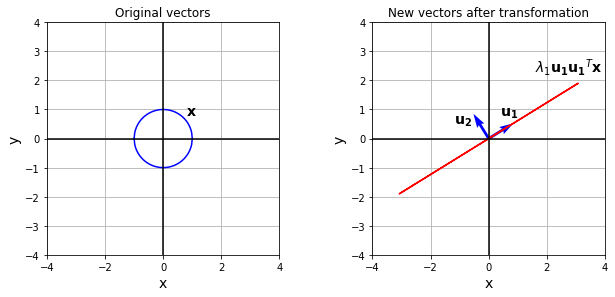

In [23]:
# Listing 9

# Creating the vectors for a circle and storing them in x
xi1 = np.linspace(-1.0, 1.0, 100)
xi2 = np.linspace(1.0, -1.0, 100)
yi1 = np.sqrt(1 - xi1**2)
yi2 = -np.sqrt(1 - xi2**2)

xi = np.concatenate((xi1, xi2),axis=0)
yi = np.concatenate((yi1, yi2),axis=0)
x = np.vstack((xi, yi))

t = A_1 @ x  # Vectors in t are the transformed vectors of x

# getting the transformed sample of x from t
t_sample = t[:, 100]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,15))

plt.subplots_adjust(wspace=0.4)

# Plotting s
ax1.plot(x[0,:], x[1,:], color='b')
ax1.set_xlabel('x', fontsize=14)
ax1.set_ylabel('y', fontsize=14)
ax1.set_xlim([-4,4])
ax1.set_ylim([-4,4])
ax1.set_aspect('equal')
ax1.grid(True)
ax1.set_title("Original vectors")
ax1.axhline(y=0, color='k')
ax1.axvline(x=0, color='k')
ax1.text(0.8, 0.8, "$\mathbf{x}$", fontsize=14)

# Plotting t
ax2.plot(t[0, :], t[1, :], color='r')
ax2.quiver(*origin, u[0,:], u[1,:], color=['b'], width=0.012, angles='xy', scale_units='xy', scale=1)
ax2.set_xlabel('x', fontsize=14)
ax2.set_ylabel('y', fontsize=14)
ax2.set_xlim([-4,4])
ax2.set_ylim([-4,4])
ax2.set_aspect('equal')
ax2.grid(True)
ax2.set_title("New vectors after transformation")
ax2.axhline(y=0, color='k')
ax2.axvline(x=0, color='k')
ax2.text(0.4, 0.8, "$\mathbf{u_1}$", fontsize=14)
ax2.text(-1.2, 0.5, "$\mathbf{u_2}$", fontsize=14)
ax2.text(1.6, 2.3, "$\lambda_1\mathbf{u_1}\mathbf{u_1}^T\mathbf{x}$", fontsize=14)
#plt.savefig('8.png', dpi=300, bbox_inches='tight')

plt.show()

## Mathematical summary of the above concepts

Rearranging the eigendecomposition function above, it can be re-arranged so that you can see A is also a smm of projection matrices. aka a linear combination of projection matrices where the eigenvalues are the coefficients

<img src="https://miro.medium.com/max/229/1*vwSEaqojcKyueynznYP5tQ@2x.png" width=200 height=200>

<img src="https://miro.medium.com/max/1221/1*QAF1hPtnJeu2rT1WPUTkXA@2x.png" width=600 height=600>

<img src="https://miro.medium.com/max/692/1*otI0a76fmqhHxHbm7cT9ZQ@2x.png" width=400 height=400>

This also means that when we transform x with A, to get a new vecto Ax

<img src="https://miro.medium.com/max/887/1*bHtlUeMLVlkXEyRnj3wIqQ@2x.png" width=500 height=500>

That the new vector Ax is a sum of the scaled projections of x onto A's eigenvectors. In the diagram below, x is the original vector x, the green vectors are x projected onto the two eigenvectors of A, u_1 and u_2,the red lines are those projections scaled by lambda_1 and Lambda_2 respectively, and the purple line is the sum of the two red lines which is the same as vector Ax. 

<img src="https://miro.medium.com/max/3725/1*wMBmVvBUMUhKsr6Q8oMpzA.jpeg" width=800 height=800>

The bigger the eigenvalue, the bigger the length of the resulting vector (λi ui ui^Tx) is, and the more weight is given to its corresponding matrix (ui ui^T). So we can approximate our original symmetric matrix A by summing the terms which have the highest eigenvalues. For example, if we assume the eigenvalues λi have been sorted in descending order

<img src="https://miro.medium.com/max/783/1*Q3obxvAgZKuvV2Cz6p1bjw@2x.png" width=500 height=500> 

then we can take the largest k terms in the eigendecomposition equation to have a good approximation for the original matrix A:


<img src="https://miro.medium.com/max/892/1*yKxlMniky18a9WdsG3fE-w@2x.png" width=500 height=500> 

A_k is the approximation of A with the first k terms. If we only include the first k eigenvalues and eigenvectors in the original eigendecomposition we get the same approximation. D_k is a k×k diagonal matrix comprised of the first k eigenvalues of A, P_k is an n×k matrix comprised of the first k eigenvectors of A, and its transpose becomes a k×n matrix. So their multiplication still gives an n×n matrix

<img src="https://miro.medium.com/max/1312/1*EXbElSjrgnH-Lt8tOIKvow@2x.png" width=700 height=700> 

The matrix C has two eignevalues, one of which is much larger than the other

<img src="https://miro.medium.com/max/279/1*pT6y33oLXxpmiVwgrpXv8g@2x.png" width=200 height=200>
<img src="https://miro.medium.com/max/629/1*Jx9crQ5BZeRKsue5jqWDOQ@2x.png" width=500 height=500>

if you approximate the transformationof unit circle x by C, Cx, using instead only the larger projection matrix and eigenvalue lamba_1 u_1 u_1^T, then you get the circle transformed onto a line on your very right. This makes sense as you know that symmetric matrices stretch and squeeze along the major axes and since as you saw with the previous projection matrix like lamda_1 u_1 u_1^T, one eigen vector is positive and the other is zero. 

<img src="https://miro.medium.com/max/2552/1*2pYTn5tEWbScloiJ6oGxsQ.png" width=700 height=700>

The reason this is true is that symmetric matrices have eignevectors that are both linearly independant (can be used as a new vector basis) and also this linear independance is of the orthogonal type. 

The full rank (2 dimensions in 2 dimensions out ie 2 positive and real eigenvalues) and linear independance property allows us to express x as a linear combination of A's eigenvectors.

<img src="https://miro.medium.com/max/562/1*S9Z46Ths7uWZcwhNuI5FLg@2x.png" width=500 height=500>


The orthogonality allows us to express the coordinates, a_i aka coefficients, of x in the eigen-basis as the 
projections of x onto those eigenvectors: 

(u_i^T x) = a_i

<img src="https://miro.medium.com/max/771/1*L9YIMpidq6cBBQlmeML9gw@2x.png" width=600 height=600>


<img src="https://miro.medium.com/max/912/1*YSt3L79RJTdl8BfjxG3OJQ@2x.png" width=600 height=600>


Since u_i is an eigenvector of A, A will have the effect on u_i of simply scaling u_i by a factor of lamda_i without rotation, so the above expression becomes:

<img src="https://miro.medium.com/max/937/1*CI6GrWiYKTjoPKBceMVn6Q@2x.png" width=700 height=700>

The example belows shows one failure mode of non-symmetirc matrices, complex eigenvalues and vectors


In [33]:
C = np.array([[3, -1],
              [1, 2]]) 

lam_C, u_C = LA.eig(C)
print("lam=", np.round(lam_C, 4))
print("u=", np.round(u_C, 4))
u_C[:,0] @ u_C[:,1] # the eigenvectors are are orthogonal, yet the rank is 1 

lam= [2.5+0.866j 2.5-0.866j]
u= [[0.7071+0.j     0.7071-0.j    ]
 [0.3536-0.6124j 0.3536+0.6124j]]


(1.0000000000000002+0j)

## Singular Value Decomposition (SVD) background

SVD is used to approximate non-square and or non symetric matrices the way eigendecomposition does for symmetric matrices.

A is an m×n matrix. so A^T A is an nxn matrix. The transpose of a product is the product of the transposes in the reverse order. So

<img src="https://miro.medium.com/max/554/1*bSqsqGzaZP3wuegSmPYzjg@2x.png" width=400 height=400>

Being equal to your transpose makes you a symmetric matrix, and that is what A^T A is

v_i is an eigenvector of A^T A. Then the L2 norm of the vector A v_i is

<img src="https://miro.medium.com/max/667/1*ps8X2pX2KsSKiKUj0XGwgg@2x.png" width=500 height=500>

Symmetric matrix A^T A only scales it's eigenvectors v_i by its corresponding eigenvalue lambda_i, so 
A^T A v_i = lamda v_i. Then the scalar lamda_i can be brought out, since dot product is commutative, to get

<img src="https://miro.medium.com/max/596/1*v26RBaNz02UJih_5dtckkw@2x.png" width=500 height=500>

v_i v_i^T = 1 since they are normalized to ||v_i|| = 1

<img src="https://miro.medium.com/max/442/1*OpQU2srrPeA4VbdRasvEzA@2x.png" width=400 height=400>

## Singular Values

Assume that lamda_i is the largest eigenvalue and that the indicies have then sorted those eigenvalues in decending order.

<img src="https://miro.medium.com/max/417/1*PwL_Ecjp_cgt-5asB1_0Sw@2x.png" width=400 height=400>

The interesting result here is that the length of A v_i , aka the magnitude of A matrix-vector multiplied with one of the eigenvectors of A^T A, is the square root of that eignevector's corresponding eigenvalue. This square root term is the analog to the eigenvalues, the singular values sigma 

<img src="https://miro.medium.com/max/412/1*gXS1pbGjpdcH6HkWIi3Mgw@2x.png" width=400 height=400>

For arbitrary vecor x, singular vector A v_i is showing a direction of stretching for A x they way that u_i was a direction of stretch for Ax back when A was a symmetric square matrix. The example of a non-symetric version of A below shows that although A is not symetric, A^T A is, and in the red left ellipse, it's eignevectors point in the direction of the major axes. The blue ellipse on the right is the transformation of the unit circle, previously it was shown that it's eigenvectors u_i do not point in the direction of the major axes, but as shown here the singular vectors A v_i do.


<img src="https://miro.medium.com/max/271/1*aTjz24-8TBisxhu3bqsfTg@2x.png" width=200 height=200>

<img src="https://miro.medium.com/max/2628/1*uHMRtxwR7h4IzW6bXsLapQ.png" width=800 height=800>


## The Singular Value Decomposition (SVD) Equation

As a reminder singular values s_i = sqrt(lamda_i) = ||A v_i||, where v_i and lamda_i are eigenvectors and eigenvalues of A^T A

A is an m×n matrix with rank A = r, the number of non-zero singular values, s_i, of A is r, they are positive and sorted in decreasing order, underneath each s_i is shown their corresponding eigenvector. 

<img src="https://miro.medium.com/max/342/1*D5CjdPz2_ZwO0FCVpa-txQ@2x.png" width=200 height=200>

Rank r implies that the singular values beyond r, the smallest singular value, s_r, are zero

<img src="https://miro.medium.com/max/500/1*6I5HHYIOGh7OKCD3Sqjleg@2x.png" width=300 height=300>

Singular Value Decomposition is the expression of a matrix A as the product of 3 matrices:

U is a mxm matrix where the first r columns are the normalized singular vectors and the last m - r columns are calculated by something called the Gram-Schmidt Process:

<img src="https://miro.medium.com/max/600/1*XPO8kthsc1HqLwN8qrCKZQ@2x.png" width=400 height=400>


Uppercase Sigma is a mxn diagonal matrix where the first r diagonals are the sorted r singular values and the remaining n - r are zero

V is an nxn matrix where each column in V, each row in V^T, are the normalized eigenvectors of A^T A, aka a orthonormal set put together as an orthogonal matrix

<img src="https://miro.medium.com/max/1196/1*whsfU88o1UEvXmVnmp6IuQ@2x.png" width=700 height=700>

<img src="https://miro.medium.com/max/233/1*N0vu8qXewtKCLG_cztrxhA@2x.png" width=200 height=200>

Similar to how symmetric matrices can be expessed as a linear combination of lamda scaled nxn matrices, where the eigenvalue lamdas are weights to the proportion the matrix helps to approximate A, in the case of mxn matrix A, each σ_i u_i v_i^T is an m×n matrix, and the SVD equation decomposes the matrix A into r matrices with the same shape (m×n)

<img src="https://miro.medium.com/max/835/1*fPRdjjlN8FQyIF2o2NjDog@2x.png" width=500 height=500>


recall that u_i = A v_i / ||A v_i|| and s_i = sqrt(lamda_i) = ||A v_i||, so u_i is the eigenvector analog of A and s_i is the eigenvalue analog of A

recall the nxn nx1 = nx1 transformation, where u_i u_i^T is the projection matrix that projects x onto u_i then scales it by lambda_i

<img src="https://miro.medium.com/max/887/1*bHtlUeMLVlkXEyRnj3wIqQ@2x.png" width=500 height=500>

Ax is a mxn nx1 = mx1 transformation, where u_i v_i^T is the projection matrix that projects x onto u_i then scales it by s_i

<img src="https://miro.medium.com/max/867/1*PdGC2LQKJqrZQtLshGbD9Q@2x.png" width=500 height=500>

Infact, if A is symmetric

<img src="https://miro.medium.com/max/571/1*8ZrIUbVbdw3gCI2llk4AsQ@2x.png" width=500 height=500>

## SVD implementation

lets perform SVD on the 2x3 matrix 

<img src="https://miro.medium.com/max/321/1*A2wLKTFQW_c6gJoA6Bn0IA@2x.png" width=200 height=200>


In [35]:
# Listing 10 


# m = 2, n = 3
A = np.array([[4, 1, 3],
              [8, 3, -2]])

lam, v = LA.eig(A.T @ A)

#  Since A^T A is a symmetric matrix, it has two non-zero eigenvalues, its rank is 2 
#  so the 2nd eigenvalue is zero.
print("lam=", np.round(lam, 4)) 
print("v= \n", np.round(v, 4))

lam= [90.1167  0.     12.8833]
v= 
 [[ 0.9415  0.3228  0.0969]
 [ 0.3314 -0.9391 -0.0906]
 [-0.0617 -0.1174  0.9912]]


In [40]:
# V the nxn or 3x3 matrix is contructed such that each column is a eigenvector of A^T A

indices_ascending_by_lambda = lam.argsort()
print(indices_ascending_by_lambda)
indices_descending_by_lambda = indices_ascending_by_lambda[::-1]
print(indices_descending_by_lambda)
V = v[:, indices_descending_by_lambda]
print("V=", np.round(V, 4))

[1 2 0]
[0 2 1]
V= [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]


In [48]:
# Sigma is and mxn matrix with the first r diagonals as the sqrt of lamda 

lam_sorted = np.sort(lam)[::-1]
lam_sorted = lam_sorted[lam_sorted > 1e-8]
sig = np.sqrt(lam_sorted)
Sigma = np.zeros((A.shape[0], A.shape[1]))
r = len(sig) # r is equal to n or m, whichever is smaller, its also equal to the number of nonzero lambdas
Sigma[:r, :r] = np.diag(sig)

print("Sigma=\n", np.round(Sigma, 4))

Sigma=
 [[9.493  0.     0.    ]
 [0.     3.5893 0.    ]]


In [50]:
# U is a mxm matrix with the first r columns as the sorted normalized singular vectors, A v_i / s_i 
# since s_i = ||A v_i|| = sqrt(lambda_i)

U = A @ V[:,:r] / sig
print("U=", np.round(U, 4))

U= [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]


 SV decomposition of A
 
 <img src="https://miro.medium.com/max/1342/1*d_yd1UtvkhiiPx9kFeAiRw@2x.png" width=700 height=700>
 
notice that if you use numpy's built in svd function V and U are the negative of what we got and Sigma comes as an array 


In [59]:
print("A=\n", A)
U, s, VT = LA.svd(A)
print("U=\n", np.round(-U, 4))
print("s=\n", np.round(np.diag(s), 4))
print("V=\n", np.round(-VT.T, 4))


Sigma = np.zeros((A.shape[0], A.shape[1]))
Sigma[:r, :r] = np.diag(s)
A_reconstructed = -U @ Sigma @ -VT
print("Reconstructed A=\n", A_reconstructed)

A=
 [[ 4  1  3]
 [ 8  3 -2]]
U=
 [[ 0.4121  0.9111]
 [ 0.9111 -0.4121]]
s=
 [[9.493  0.    ]
 [0.     3.5893]]
V=
 [[ 0.9415  0.0969  0.3228]
 [ 0.3314 -0.0906 -0.9391]
 [-0.0617  0.9912 -0.1174]]
Reconstructed A=
 [[ 4.  1.  3.]
 [ 8.  3. -2.]]


## geometric view of SVD

A projects 3D space onto 2D, the 3D sphere on your left is flattened into the 2D ellipse on your right

The vectors u1 and u2 show the directions of stretching. The eclipse produced by Ax is not hollow like the ones that we saw before, and the transformed vectors fill it completely.

<img src="https://miro.medium.com/max/1109/1*NUeBWOlU-Bnx1YQj_Xf3zw.png" width=700 height=700> 

Similar to the eigendecomposition method, we can approximate matrix A by summing the projection matrices which have the k highest singular values, which means we only include the first k vectors in U and V matrices in the decomposition equation, and we get the mxk kxk kxn = mxn equation below

<img src="https://miro.medium.com/max/987/1*FKZkc4fGEt5Fr03D_5SQdQ@2x.png" width=700 height=700> 


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
#import nltk
import json

%matplotlib inline

## Latent Semantic Analysis 

Now that we understand the math behind SVD we will see how it is applied to NLP through LSA, a technique for creating a vector representation of a document. Having a vector representation of a document gives you a way to compare documents for their similarity by calculating the distance between the vectors. This in turn means you can do handy things like Topic Modeling, classifying documents to determine which of a set of known topics they most likely belong to.

In [5]:
content_list = [
"the grocery store has bananas",
"the grocery store has fruit",
"bananas are fruit",
"the pet store has puppy treats",
"the pet store has kitty litter",
"puppy treats and kitty litter",
"the bookstore has books",
"the bookstore has magazines",
"magazines and books",
]

news_df = pd.DataFrame({'document':content_list})
    
# removing everything except alphabets`
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z#]", " ")
# removing null fields
news_df = news_df[news_df['clean_doc'].notnull()]
# removing short words
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>1]))
# make all text lowercase
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

news_df['clean_doc'].head

<bound method NDFrame.head of 0     the grocery store has bananas
1       the grocery store has fruit
2                 bananas are fruit
3    the pet store has puppy treats
4    the pet store has kitty litter
5     puppy treats and kitty litter
6           the bookstore has books
7       the bookstore has magazines
8               magazines and books
Name: clean_doc, dtype: object>

In [6]:
#  Stop words are words like “a”, “the”, or “in” which don’t convey significant meaning 

stop_words = [] #stop_words = stopwords.words('english')
#stop_words.extend(['span','class','spacing','href','html','http','to', 'the', 'and'])

# tokenization
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split())
# remove stop-words
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])
# print(tokenized_doc)

# de-tokenization
detokenized_doc = []
for i in range(len(tokenized_doc)):
    if i in tokenized_doc:
        t = ' '.join(tokenized_doc[i])
        detokenized_doc.append(t)

print(tokenized_doc)
print(detokenized_doc)

0      [the, grocery, store, has, bananas]
1        [the, grocery, store, has, fruit]
2                    [bananas, are, fruit]
3    [the, pet, store, has, puppy, treats]
4    [the, pet, store, has, kitty, litter]
5      [puppy, treats, and, kitty, litter]
6             [the, bookstore, has, books]
7         [the, bookstore, has, magazines]
8                  [magazines, and, books]
Name: clean_doc, dtype: object
['the grocery store has bananas', 'the grocery store has fruit', 'bananas are fruit', 'the pet store has puppy treats', 'the pet store has kitty litter', 'puppy treats and kitty litter', 'the bookstore has books', 'the bookstore has magazines', 'magazines and books']


## Term Frequency Inverse Document Frequency

Term Frequency = count of a particular word within a particular document divided by the count of the most frequent word in that document 

Inverse Document Frequency = count of documents divided by the number of documents that contain that word 

<img src="http://www.joyofdata.de/blog/wp-content/uploads/2014/02/tf-idf.png">

The Matrix X is our Document-Term Matrix of shape (num docs, num terms) each element is the tfidf of that particular word for that particular document. X is produced in the cell below

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf vectorizer of scikit learn limit to 1max_features terms
# max_df = 0.9 means ignore words that occur in more than 90% of the documents
# max_df = 0.0 means ignore words that occur in less than 0% of the documents

vectorizer = TfidfVectorizer(stop_words=stop_words, 
                             max_features=16, 
                             max_df = 1.0, 
                             min_df = 0.0,
                             use_idf = True, 
                             ngram_range=(1,1))

X = vectorizer.fit_transform(detokenized_doc)
print(X.shape) # check shape of the document-term matrix (docs, words)
terms = vectorizer.get_feature_names()
print(terms, len(terms))
print("X Shape - num_docs ", X.toarray().shape[0], ", num terms", X.toarray().shape[1])
X.toarray() 

(9, 16)
['and', 'are', 'bananas', 'books', 'bookstore', 'fruit', 'grocery', 'has', 'kitty', 'litter', 'magazines', 'pet', 'puppy', 'store', 'the', 'treats'] 16
X Shape - num_docs  9 , num terms 16


array([[0.        , 0.        , 0.54652193, 0.        , 0.        ,
        0.        , 0.54652193, 0.3364164 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41985185, 0.3364164 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54652193, 0.54652193, 0.3364164 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41985185, 0.3364164 ,
        0.        ],
       [0.        , 0.64192944, 0.54218382, 0.        , 0.        ,
        0.54218382, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29520591, 0.        , 0.        ,
        0.        , 0.47957383, 0.47957383, 0.36842064, 0.29520591,
        0.47957383],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 

In [22]:
# bananas 1 out of 5 words in, the first document and present in 2 out of 9 documents 
print(1/5 * 9/2)
print("X Shape - num_docs ", X.toarray().shape[0], ", num terms", X.toarray().shape[1])
X.toarray() 

0.9
X Shape - num_docs  9 , num terms 16


array([[0.        , 0.        , 0.54652193, 0.        , 0.        ,
        0.        , 0.54652193, 0.3364164 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41985185, 0.3364164 ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.54652193, 0.54652193, 0.3364164 , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.41985185, 0.3364164 ,
        0.        ],
       [0.        , 0.64192944, 0.54218382, 0.        , 0.        ,
        0.54218382, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.29520591, 0.        , 0.        ,
        0.        , 0.47957383, 0.47957383, 0.36842064, 0.29520591,
        0.47957383],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 

In [15]:
from numpy import linalg as LA

LA.norm(X.toarray()[0,:], 2)


1.0

## The NLP meaning of U Sigma and VT

We use SVD to decompose X into low dimensional components k = n_components. X = U Sigma VT

Where the columns of U are the left singular vectors (gene coefficient vectors); S (the same dimensions as A) has singular values and is diagonal (mode amplitudes); and VT has rows that are the right singular vectors (expression level vectors). The SVD represents an expansion of the original data in a coordinate system where the covariance matrix is diagonal.

Calculating the SVD consists of finding the eigenvalues and eigenvectors of XXT and XTX. The eigenvectors of XTX make up the columns of V , the eigenvectors of XXT  make up the columns of U. Also, the singular values in S are square roots of eigenvalues from XXT or XTX

After SVD in "printing the concepts words" we have k groupings of words in VT what are related, The right singular vectors capture connections among different terms with similar meanings or topic areas. If three terms tend to appear in the same documents, the SVD is likely to produce a singular vector in VT with large values for those three terms.

In [59]:
from sklearn.utils.extmath import randomized_svd

# randomized_svd finds an approximate truncated singular value decomposition 
# using randomization to speed up the computations

U, Sigma, VT = randomized_svd(X.toarray(), n_components=3, n_iter=100, random_state=122)
print("U - the left vectors that are eigenvectors of XX^T of shape (num_docs x k) \n", U.shape)
print("Sigma - the singular values of shape (k x k) \n", Sigma.shape)
print("VT - the right vectors that are eigenvectors of X^T X of shape (k x num_terms) \n", VT.shape)

U - the left vectors that are eigenvectors of XX^T of shape (num_docs x k) 
 (9, 3)
Sigma - the singular values of shape (k x k) 
 (3,)
VT - the right vectors that are eigenvectors of X^T X of shape (k x num_terms) 
 (3, 16)


In [67]:
# printing the concepts words

num_top_words = 5

for i, compressed in enumerate(VT):
        terms_comp = zip(terms, compressed)
        sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)
        print("Concept "+str(i)+": ")
        top_terms = sorted_terms[:num_top_words]
        for t in top_terms :
            print(t[0])
        print(" ")
        print(top_terms)
        print(" ")

Concept 0: 
buy
some
store
puppy
treats
 
[('buy', 0.4369759802297508), ('some', 0.36572162257017016), ('store', 0.351302434085869), ('puppy', 0.23076176416519875), ('treats', 0.23076176416519875)]
 
Concept 1: 
card
bookstore
book
buy
bought
 
[('card', 0.4837225013053067), ('bookstore', 0.48372250130530664), ('book', 0.4837225013053061), ('buy', 0.21853889862050363), ('bought', -0.048536036680929026)]
 
Concept 2: 
fruits
grocery
bananas
bought
store
 
[('fruits', 0.46818293286606644), ('grocery', 0.41901765682699516), ('bananas', 0.3526734817530042), ('bought', 0.23788253811706192), ('store', 0.10424445366260679)]
 


## Document Vector Compression and Vector representation of terms

below we how have SVD has allowed us not only to find the keys words of each of our k topics, above, but also
represented both our documents and terms as k dimensional vectors that can be compared by vector similarity

In [68]:
compressed_documents = U*Sigma
print("compressed_documents\n", compressed_documents, compressed_documents.shape)
print("both about groceries", compressed_documents[0].dot(compressed_documents[1]))
print("groceries and books", compressed_documents[0].dot(compressed_documents[-1]))

compressed_documents
 [[ 0.5760565  -0.3800911   0.39035674]
 [ 0.55230253 -0.17656346  0.57515242]
 [ 0.49678612 -0.16463917  0.52082819]
 [ 0.68861443 -0.29700927 -0.44458813]
 [ 0.61153518 -0.2527638  -0.32039763]
 [ 0.62462333 -0.27807359 -0.47095479]
 [ 0.43237034  0.71778815 -0.00386421]
 [ 0.43237034  0.71778815 -0.00386421]
 [ 0.43237034  0.71778815 -0.00386421]] (9, 3)
both about groceries 0.6097822812609176
groceries and books -0.0252635616236835


In [71]:
compressed_terms = VT.T*Sigma
print("compressed_terms\n", compressed_terms, compressed_terms.shape)
term_vector_dict = dict(zip(terms, compressed_terms))
print(term_vector_dict["bananas"].dot(term_vector_dict["fruits"]))
print(term_vector_dict["bananas"].dot(term_vector_dict["book"]))

compressed_terms
 [[ 0.32390944 -0.1917823   0.39847377]
 [ 0.35184416  0.68028625 -0.00455853]
 [ 0.35184416  0.68028625 -0.00455853]
 [ 0.17684592 -0.06825897  0.26877539]
 [ 0.71573776  0.30734359  0.00511587]
 [ 0.35184416  0.68028625 -0.00455853]
 [ 0.35004549 -0.22512665 -0.02036745]
 [ 0.34939512 -0.13212856  0.52898397]
 [ 0.3745708  -0.20860564  0.4734338 ]
 [ 0.34747501 -0.17378209 -0.32244489]
 [ 0.2036098  -0.09801512 -0.15464502]
 [ 0.37444166 -0.18449302 -0.32011641]
 [ 0.37797251 -0.19270484 -0.38133001]
 [ 0.59902783 -0.32031562 -0.07778509]
 [ 0.57541016 -0.30198825  0.11778226]
 [ 0.37797251 -0.19270484 -0.38133001]] (16, 3)
0.34929853293280444
-0.018317675195983724
